In [32]:
import math 
import tensorflowjs
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #used to scale the datasets
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

df=web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end= '2019-12-17')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000,5.450000
...,...,...,...,...,...,...
2019-12-11,71.438004,70.218002,70.375999,70.540001,34489000,70.540001
2019-12-12,72.547997,70.646004,70.984001,71.935997,38819500,71.935997
2019-12-13,73.042000,70.928001,72.209999,71.678001,32854500,71.678001


In [33]:
df.shape

(2003, 6)

Text(0, 0.5, 'Close Price USD')

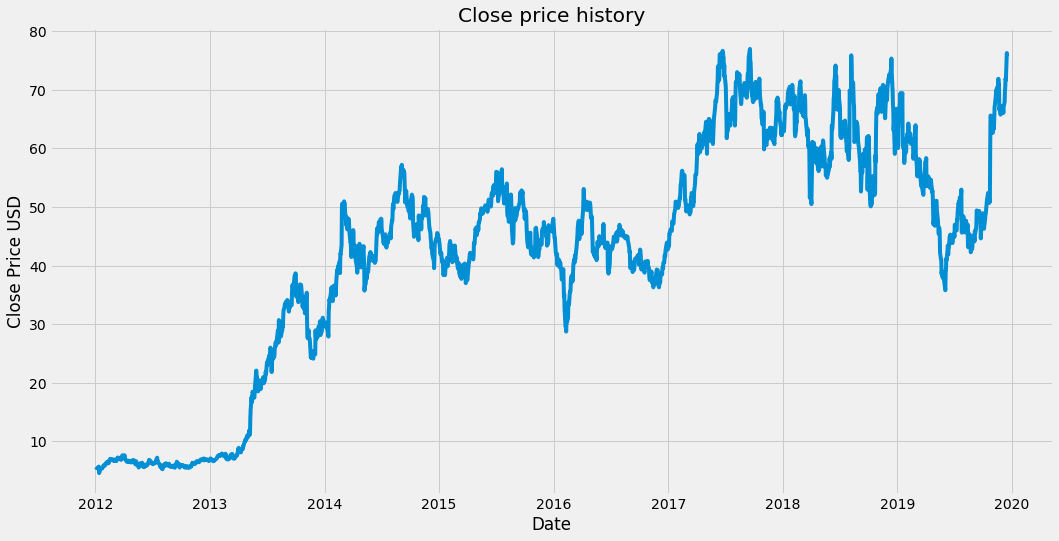

In [34]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD')

In [35]:
df = df['Close'].values #feature declaration

df = df.reshape(-1,1)

#The reshape allows you to add dimensions or change the number of elements in each dimension. We are using reshape(-1, 1) 
# because we have just one dimension in our array, so numpy will create the same number of our rows and 
# add one more axis: 1 to be the second dimension.

In [36]:
#split data
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [37]:
#scale data
scaler = MinMaxScaler(feature_range= (0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.fit_transform(dataset_test)
dataset_train

array([[0.01460479],
       [0.01358328],
       [0.01195439],
       ...,
       [0.76825601],
       [0.74316006],
       [0.72165316]])

In [38]:
# function to create datasets

def create_dataset(df):
    x= []
    y = []
    for i in range (50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)

    return x, y

In [39]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [40]:
#3d array reshaping for LSTM layers
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [41]:
model = Sequential()
model.add(LSTM(units=96,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= 96, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 50, 96)            74112     
_________________________________________________________________
dropout_10 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 96)               

In [42]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [43]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [50]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

model.save('stock_prediction.h5')



Epoch 1/50
49/49 [==============================] - 8s 67ms/step - loss: 0.0022
Epoch 2/50
49/49 [==============================] - 3s 66ms/step - loss: 0.0014
Epoch 3/50
49/49 [==============================] - 3s 66ms/step - loss: 0.0013
Epoch 4/50
49/49 [==============================] - 3s 66ms/step - loss: 0.0013
Epoch 5/50
49/49 [==============================] - 3s 66ms/step - loss: 0.0014
Epoch 6/50
49/49 [==============================] - 3s 64ms/step - loss: 0.0013
Epoch 7/50
49/49 [==============================] - 3s 65ms/step - loss: 0.0013
Epoch 8/50
49/49 [==============================] - 3s 68ms/step - loss: 0.0014
Epoch 9/50
49/49 [==============================] - 3s 65ms/step - loss: 0.0014
Epoch 10/50
49/49 [==============================] - 3s 66ms/step - loss: 0.0013
Epoch 11/50
49/49 [==============================] - 3s 66ms/step - loss: 0.0014
Epoch 12/50
49/49 [==============================] - 3s 66ms/step - loss: 0.0013
Epoch 13/50
49/49 [==================

NameError: name 'tensorflowjs' is not defined

In [52]:
tensorflowjs.converters.save_keras_model(model)

NameError: name 'tensorflowjs' is not defined

In [ ]:
model = load_model('stock_prediction')

KeyboardInterrupt: 

In [ ]:
scaler.scale_

array([0.0246877])

In [ ]:
#scale_factor = 1/0.02893937
#y_train = y_train * scale_factor
#y_test = y_test * scale_factor

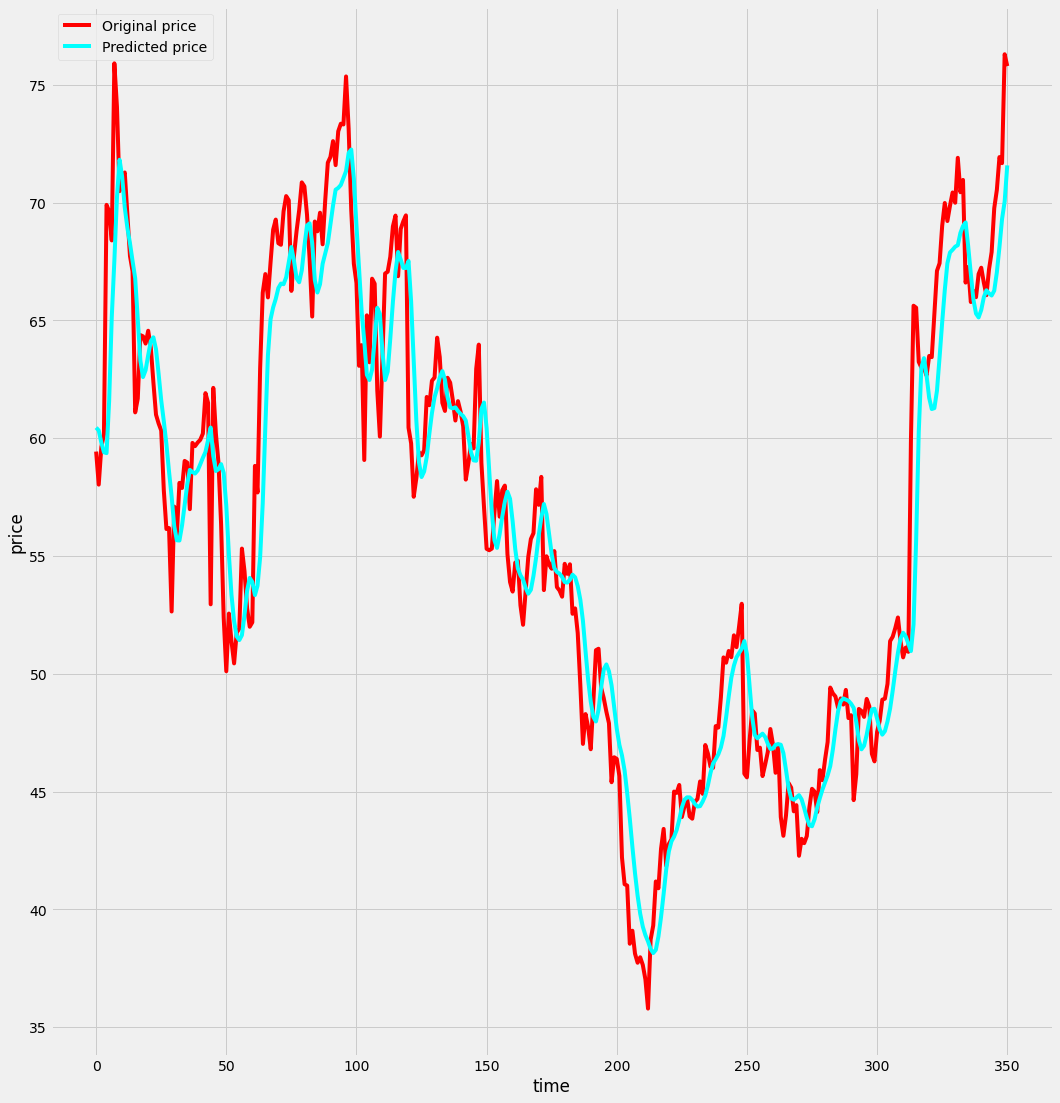

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig, ax = plt.subplots(figsize=(16,18))
#ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()